C:\Users\HP440G4\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Confusion Matrix:
 [[21 22]
 [ 7 73]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123

Logistic Regression AUC Score: 0.75


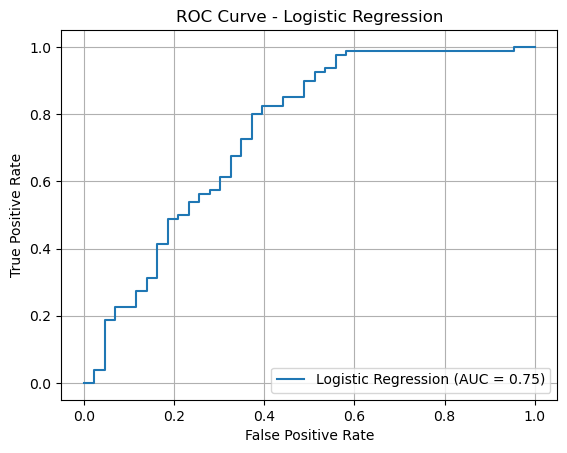


Random Forest Confusion Matrix:
 [[18 25]
 [ 3 77]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Random Forest AUC Score: 0.75


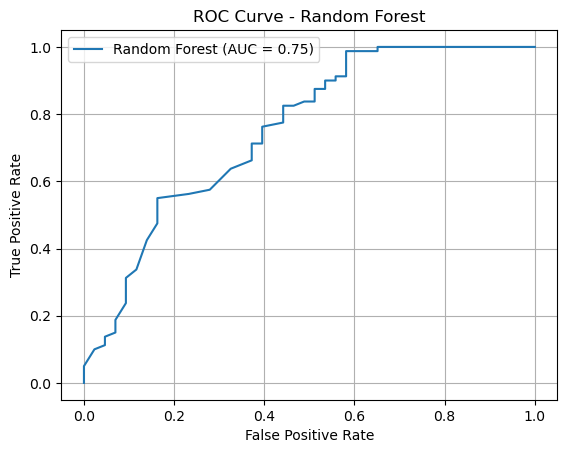


✅ Predictions saved to loan_predictions.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# File paths (update if needed)
TRAIN_PATH = r"C:\Users\HP440G4\Downloads\archive (1)\train_u6lujuX_CVtuZ9i.csv"
TEST_PATH = r"C:\Users\HP440G4\Downloads\archive (1)\test_Y3wMUE5_7gLdaTN.csv"

# Preprocessing function
def preprocess(df, is_train=True):
    df = df.copy()
    
    # Drop Loan_ID
    if 'Loan_ID' in df.columns:
        df.drop('Loan_ID', axis=1, inplace=True)

    # Target column for training
    if is_train:
        df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

    # Fill missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

    # Encode categorical features
    cat_cols = df.select_dtypes(include='object').columns
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
    
    return df

# Train and return models
def train_models(X_train, y_train):
    lr = LogisticRegression(class_weight='balanced', max_iter=1000)
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)

    lr.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    return lr, rf

# Evaluate a model
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"{name} AUC Score: {roc_auc:.2f}")

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
def main():
    # Load data
    train_df = pd.read_csv(TRAIN_PATH)
    test_df = pd.read_csv(TEST_PATH)

    # Preprocess
    train_df = preprocess(train_df, is_train=True)
    test_df_clean = preprocess(test_df, is_train=False)

    # Split training set into train/validation
    X = train_df.drop('Loan_Status', axis=1)
    y = train_df['Loan_Status']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train models
    lr_model, rf_model = train_models(X_train, y_train)

    # Evaluate
    evaluate_model(lr_model, X_val, y_val, "Logistic Regression")
    evaluate_model(rf_model, X_val, y_val, "Random Forest")

    # Optional: Predict on test set (no target column)
    rf_predictions = rf_model.predict(test_df_clean)
    output = pd.read_csv(TEST_PATH)[['Loan_ID']]
    output['Loan_Status'] = np.where(rf_predictions == 1, 'Y', 'N')
    
    # Save predictions
    output.to_csv('loan_predictions.csv', index=False)
    print("\n✅ Predictions saved to loan_predictions.csv")

if __name__ == "__main__":
    main()


In [5]:
import joblib
joblib.dump(rf_model, 'loan_rf_model.pkl')


NameError: name 'rf_model' is not defined

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
train_path = r"C:\Users\HP440G4\Downloads\archive (1)\train_u6lujuX_CVtuZ9i.csv"
df = pd.read_csv(train_path)

# Drop rows with missing values (simple method for now)
df.dropna(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']:
    df[col] = le.fit_transform(df[col])

# Feature selection
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [9]:
import joblib
joblib.dump(rf_model, 'loan_rf_model.pkl')
print("✅ Model saved as loan_rf_model.pkl")


✅ Model saved as loan_rf_model.pkl


In [11]:
import joblib

# Specify full path
save_path = r"C:\Users\HP440G4\Desktop\loan\loan_rf_model.pkl"

# Save the model
joblib.dump(rf_model, save_path)

print("✅ Model saved successfully to Desktop/loan folder!")


✅ Model saved successfully to Desktop/loan folder!
